In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d

from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

# mapa de gz

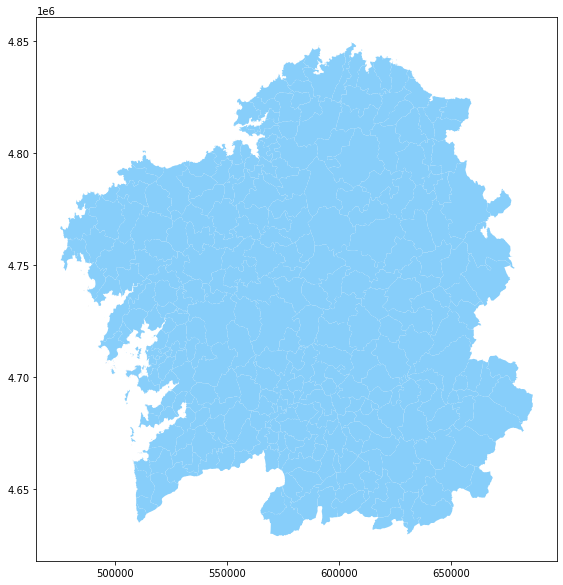

In [47]:
mapagz=gpd.read_file("/home/manu/Programacion/python/geopandas/Concellos/Concellos_IGN.shp")
#mapagz=gpd.read_file("https://github.com/mvilarinho/mapas/blob/master/Concellos/Concellos_IGN.shp")

_,ax=plt.subplots(figsize=(20,10))
mapagz['centroides']=mapagz.geometry.centroid

base=mapagz.plot(ax=ax,color='LightSkyBlue')


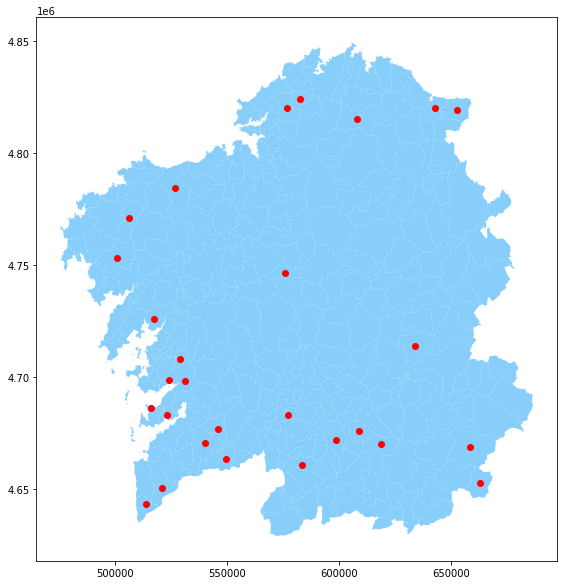

In [48]:
concellosBNG=['A Mezquita','Ribadeo','A Pobra do Brollón','Allariz','As Neves',
            'Baños de Molgas','Barreiros','Barro','Bueu','Carballo', 'Castrelo de Miño',
             'Mazaricos','Moaña','Mondariz','Moeche','Muras','O Rosal','Poio',
             'Ponteareas','Pontevedra','Rianxo','San Sadurniño','Santiso','Tomiño','Verea',
             'Viana do Bolo','Vilar de Barrio','Zas']

#mapaConcellosBNG=
puntosBNG=mapagz.loc[mapagz.NomeConcel.isin(concellosBNG)]['centroides']
nomesBNG=list(mapagz.loc[mapagz.NomeConcel.isin(concellosBNG)]['NomeConcel'])
_,ax=plt.subplots(figsize=(20,10))
base=mapagz.plot(ax=ax,color='LightSkyBlue')
puntosBNG.plot(ax=base,color='red')

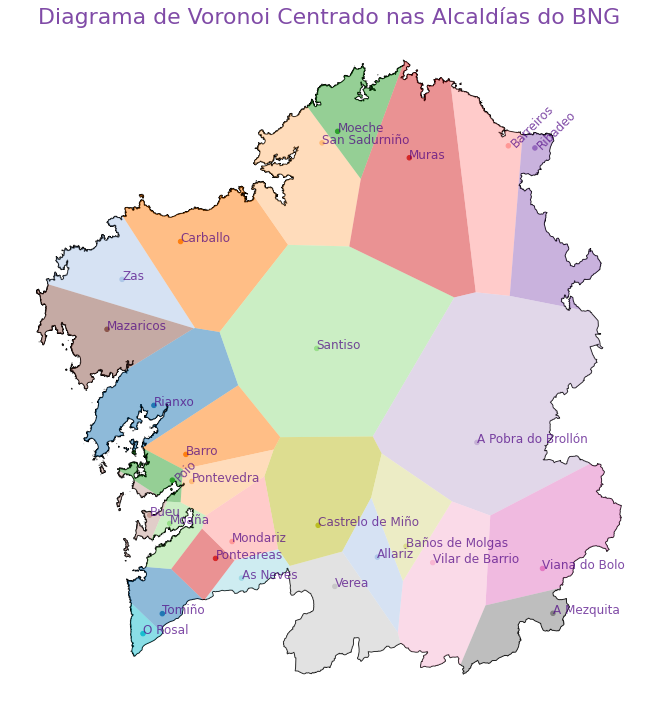

In [49]:
mapagz = mapagz.to_crs(epsg=3395) 
puntosBNG_proj =puntosBNG.to_crs(mapagz.crs)
coords = points_to_coords(puntosBNG_proj.geometry)
mapagz_shape = cascaded_union(mapagz.geometry)
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(
    coords, mapagz_shape)

fig, ax = subplot_for_map(figsize=(10,10))
plot_voronoi_polys_with_points_in_area(ax, mapagz_shape, poly_shapes, pts, 
            poly_to_pt_assignments, voronoi_and_points_cmap='tab20',  points_markersize=20)
ax.set_title('Diagrama de Voronoi Centrado nas Alcaldías do BNG',size=22,color='Indigo',alpha=0.7)
ax.axis("off")
for k in range(len(nomesBNG)):
    if nomesBNG[k] in ['Barreiros','Ribadeo','Poio']:
        ax.annotate(nomesBNG[k], coords[k],size=12,color='Indigo',rotation=45,alpha=0.7)
    else:
        ax.annotate(nomesBNG[k], coords[k],size=12,color='Indigo',alpha=0.7)
plt.tight_layout()
plt.show()
